In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

Drop " Serial No." no needed for classification

In [5]:
df = df.drop('Serial No.',axis=1)

In [6]:
df.shape

(500, 8)

In [7]:
from sklearn.preprocessing import Binarizer

In [8]:
bi = Binarizer(threshold=0.75)
df["Chance of Admit "] = bi.fit_transform(df[['Chance of Admit ']])

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0


In [10]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = df['Chance of Admit ']
y = y.astype('int') # y float is converted into y

<Axes: xlabel='Chance of Admit ', ylabel='count'>

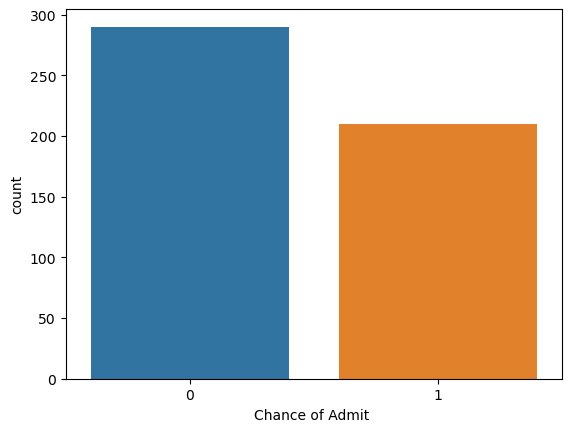

In [12]:
sns.countplot(x=y)

In [13]:
y.value_counts()

Chance of Admit 
0    290
1    210
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [16]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (375, 7)
y_train (375,)
x_test (125, 7)
y_test (125,)


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [18]:
model_dt = DecisionTreeRegressor(random_state=0)
model_rf = RandomForestRegressor(random_state=0)
model_lr = LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)

In [19]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [20]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [21]:
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [22]:
y_pred_dt = model_dt.predict(x_test) #int
y_pred_rf = model_rf.predict(x_test) #float
y_pred_lr = model_lr.predict(x_test) #

In [23]:
y_pred_rf = y_pred_rf.reshape(1,-1)

In [24]:
y_pred_rf = bi.fit_transform(y_pred_rf)
y_pred_rf = y_pred_rf.reshape(125)

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

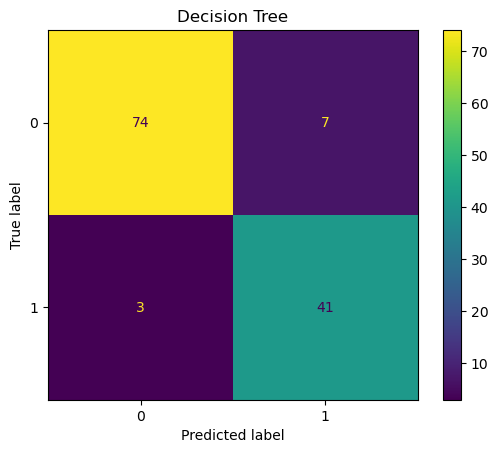

 Accuracy is 0.92
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        81
           1       0.85      0.93      0.89        44

    accuracy                           0.92       125
   macro avg       0.91      0.92      0.91       125
weighted avg       0.92      0.92      0.92       125



In [26]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.title('Decision Tree')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_dt)}")
print(classification_report(y_test,y_pred_dt))

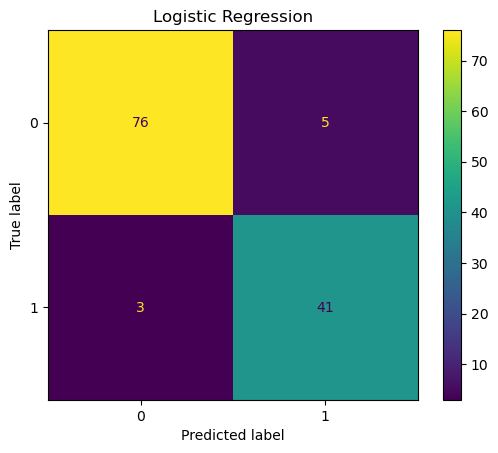

 Accuracy is 0.936
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        81
           1       0.89      0.93      0.91        44

    accuracy                           0.94       125
   macro avg       0.93      0.94      0.93       125
weighted avg       0.94      0.94      0.94       125



In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic Regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

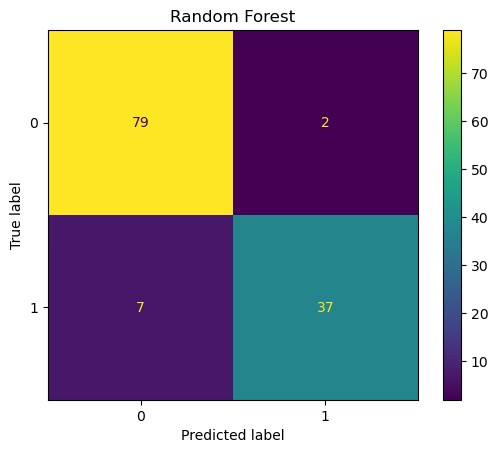

 Accuracy is 0.928
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        81
           1       0.95      0.84      0.89        44

    accuracy                           0.93       125
   macro avg       0.93      0.91      0.92       125
weighted avg       0.93      0.93      0.93       125



In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))